# Assignment 6: Numpy II and Matplotlib

***

__Question 1:__ (2.0 points) 

1. (0.5 point) Create a two-dimensional numpy array called <font color='blue'>A</font> with six rows and three columns by broadcasting the array [1 2 3 4 5 6].
2. (0.5 point) Create arrays <font color='blue'>B</font> and <font color='blue'>C</font> where <font color='blue'>B</font> is copy and <font color='blue'>C</font> is a view of <font color='blue'>A</font>, respectively. Use the method "id()" to make sure <font color='blue'>B</font> and <font color='blue'>C</font> do not reference to the same location as <font color='blue'>A</font>. 
3. (1.0 point) Reshape <font color='blue'>C</font> to have nine rows and two columns and create a new variable <font color='blue'>D</font> by copying the rows 3,6, and 8 from <font color='blue'>D</font>. 

In [2]:
# solution 

import numpy as np


In [3]:
A = np.zeros((6, 3))
l = np.array([1, 2, 3, 4, 5, 6])
A[:] = l[:, np.newaxis]
A

array([[ 1.,  1.,  1.],
       [ 2.,  2.,  2.],
       [ 3.,  3.,  3.],
       [ 4.,  4.,  4.],
       [ 5.,  5.,  5.],
       [ 6.,  6.,  6.]])

In [4]:
B = A.copy()
C = A.view()
print("id of A:", id(A))
print("id of B:", id(B))
print("id of C:", id(C))

id of A: 4613966784
id of B: 4613967664
id of C: 4614063488


In [10]:
C = C.reshape((9, 2))
C

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 2.,  2.],
       [ 3.,  3.],
       [ 3.,  4.],
       [ 4.,  4.],
       [ 5.,  5.],
       [ 5.,  6.],
       [ 6.,  6.]])

In [9]:
D = C[[3, 6, 8],:]
D

array([[ 3.,  3.],
       [ 5.,  5.],
       [ 6.,  6.]])

***

__Question 2:__ (2.0 points) Consider an $n\times n,\, n\geq 2$ array <font color='blue'>A</font>. For instance, with $n=4$:
$$
A=\left(\begin{array}[cccc]\\
1 & 3 & 2 & 6 \\
3 & 5 & 1 & {7} \\
{0} & 4 & {2} & {6} \\
6 & 1 & 3 & {1} 
\end{array}\right)
$$
Create a 2$\times$2 array <font color='blue'>B</font> where the first row corresponds to the minimal and maximal elements in the upper triangluar part of <font color='blue'>A</font> and the second row corresponds to the minimal and maximal elements in the lower triangluar part of <font color='blue'>A</font>. The main diagonal should be considered as belonging to both the upper and lower triangular part of <font color='blue'>A</font>. In the above example the solution would be 
$$
B=\left(\begin{array}[cc]\\
1 & 7  \\
0 & 6  
\end{array}\right)
$$
Your solution (the python code) should work for any $n\times n,\, n\geq 2$ array.<br>
__Hint__: Use the numpy methods "triu_indices" and "tril_indices" combined with "max" and "min".

In [5]:
# solution

# Run you code in the example to make sure it is working. 

n = 4
A = np.random.rand(n,n)
# A = np.array([[1,3,2,6],[3,5,1,7],[0,4,2,6],[6,1,3,1]])
print("A = ",A)
# Au = np.triu(A, 0)
# Al = np.tril(A, 0)
max1 = np.max(A[np.triu_indices(n, 0)])
max2 = np.max(A[np.tril_indices(n, 0)])
min1 = np.min(A[np.triu_indices(n, 0)])
min2 = np.min(A[np.tril_indices(n, 0)])
B = np.array([[min1, max1], [min2, max2]])
# n = 5
print("B = ", B)
# print(A)


A =  [[ 0.90342095  0.94209136  0.75350637  0.81194707]
 [ 0.25686357  0.68720402  0.60828614  0.26946181]
 [ 0.86863163  0.80369384  0.16902058  0.88968612]
 [ 0.35780011  0.74401059  0.53274211  0.11930222]]
B =  [[ 0.11930222  0.94209136]
 [ 0.11930222  0.90342095]]


__Question 3:__ (3.0 points) Given a set of points $(x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)$, we can fit a line $y=\alpha_0+\alpha_1 x$ to the points by solving a linear system of the form:

$$
A^\top A\alpha = A^\top b
$$

where $A^\top$ is the transpose of $A$ and 

$$
A=\left(\begin{array}{cc}
1 & x_0 \\
1 & x_1 \\
\vdots & \vdots \\
1 & x_n 
\end{array}\right),
\qquad
\alpha = \left(\begin{array}{c}
\alpha_0 \\
\alpha_1 
\end{array}\right),
\qquad
b = \left(\begin{array}{c}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{array}\right)
$$

Supposing the points $(x_i,y_i)$ are generated by the code:

```python
x = np.random.uniform(0,1,100)
y = 1.0-x+np.random.uniform(-0.3,0.3,100)
```

1. (1.5 points) Build the matrix (array) $A$
2. (1.5 points) Solve the linear system $A^\top A\alpha = A^\top b$ using "numpy.linalg.solve" and print the value of $\alpha_0$ and $\alpha_1$.


In [48]:
# Solution
x = np.random.uniform(0,1,100)

y = 1.0-x+np.random.uniform(-0.3,0.3,100)
a1 = np.array([1]*100).reshape((100,1))
a2 = np.array(x).reshape((100,1))
A = np.hstack((a1, a2))
b = np.array(y).reshape((100,1))
left = np.dot(A.T, A)
right = np.dot(A.T, b)
alpha = np.linalg.solve(left, right)
print("alpha_0:{} alpha_1:{}".format(alpha[0],alpha[1]))

alpha_0:[ 1.03650839] alpha_1:[-1.07014801]


__Question 4:__ (1.5 points) Using the result from question 3, plot the points $(x_i,y_i)$ and the fitted line. Your code should produce a figure like this:

![title](linefit.png)

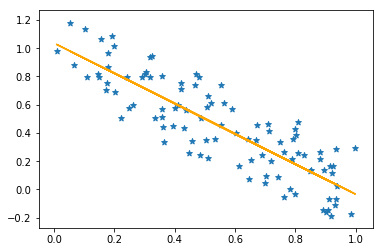

In [60]:
# Solution
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(x, alpha[1] * x + alpha[0], color='orange')
plt.scatter(x, y, marker="*")
plt.show()

__Question 5:__ (1.5 points) Enrich the plot genereted in question 4 by incorporating a legend and an annotation indicating the fitted line, similar to the following figure:

![title](annotation.png)

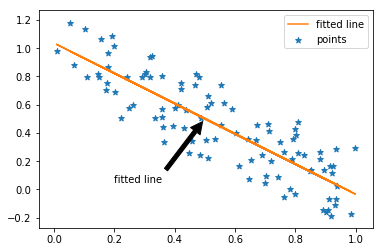

In [65]:
# Solution
fig = plt.figure()
plt.plot(x, alpha[1] * x + alpha[0], color="#ff7f0e", label = "fitted line")
plt.scatter(x, y, marker="*", label="points")
plt.legend()
plt.annotate("fitted line", xy=(0.5,0.5),xytext=(0.2, 0.05),arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()